 Covid-19 Case Study

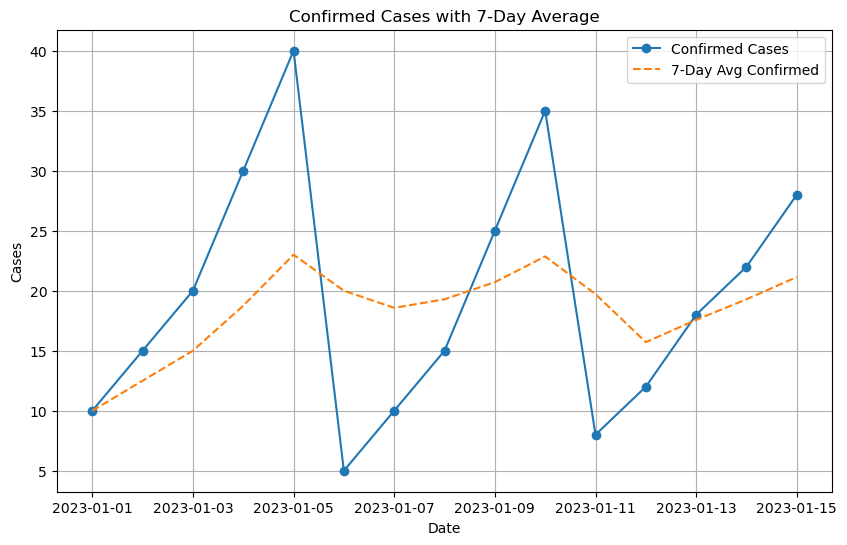

C:\Users\xavie\AppData\Local\Temp\ipykernel_20408\4167861795.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Deaths', data=data, ci=None, palette='muted')
C:\Users\xavie\AppData\Local\Temp\ipykernel_20408\4167861795.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Deaths', data=data, ci=None, palette='muted')


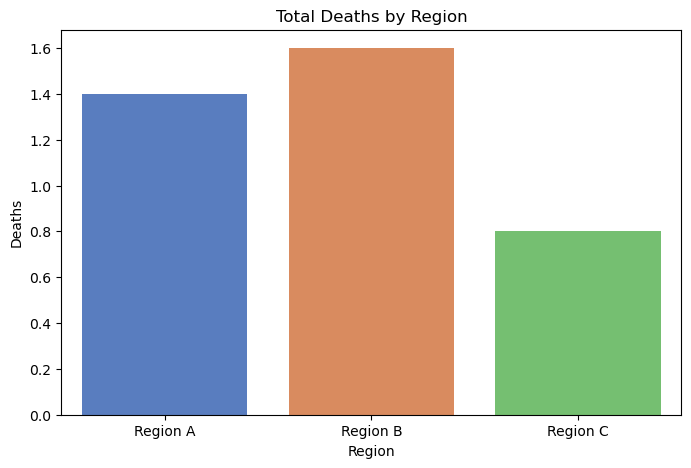

Detected Anomalies:
        Date    Region  Confirmed Cases  7-Day Avg Confirmed
3 2023-01-04  Region A               30            18.750000
4 2023-01-05  Region A               40            23.000000
9 2023-01-10  Region B               35            22.857143


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample COVID-19 Data
data_dict = {
    'Date': pd.date_range(start="2023-01-01", periods=15),
    'Region': ['Region A'] * 5 + ['Region B'] * 5 + ['Region C'] * 5,
    'Confirmed Cases': [10, 15, 20, 30, 40, 5, 10, 15, 25, 35, 8, 12, 18, 22, 28],
    'Recovered Cases': [2, 5, 10, 15, 25, 1, 3, 8, 12, 20, 0, 2, 5, 8, 15],
    'Deaths': [0, 1, 1, 2, 3, 0, 1, 1, 2, 4, 0, 0, 1, 1, 2]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Rolling Averages
data['7-Day Avg Confirmed'] = data['Confirmed Cases'].rolling(window=7, min_periods=1).mean()
data['7-Day Avg Deaths'] = data['Deaths'].rolling(window=7, min_periods=1).mean()

# Line Plot: Confirmed Cases and Rolling Average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Confirmed Cases'], label='Confirmed Cases', marker='o')
plt.plot(data['Date'], data['7-Day Avg Confirmed'], label='7-Day Avg Confirmed', linestyle='--')
plt.title('Confirmed Cases with 7-Day Average')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid()
plt.show()

# Bar Plot: Deaths by Region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Deaths', data=data, ci=None, palette='muted')
plt.title('Total Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Deaths')
plt.show()

# Anomaly Detection (Simplified)
anomalies = data[data['Confirmed Cases'] > data['7-Day Avg Confirmed'] * 1.5]
print("Detected Anomalies:")
print(anomalies[['Date', 'Region', 'Confirmed Cases', '7-Day Avg Confirmed']])
